In [1]:
import numpy as np

def softmax(y):
    exp = np.exp(y)

    output = exp / np.sum(exp)
    return output

In [2]:
y = np.array([2.0, 1.0, 3.0])
print("Softmax Output:", softmax(y))

Softmax Output: [0.24472847 0.09003057 0.66524096]


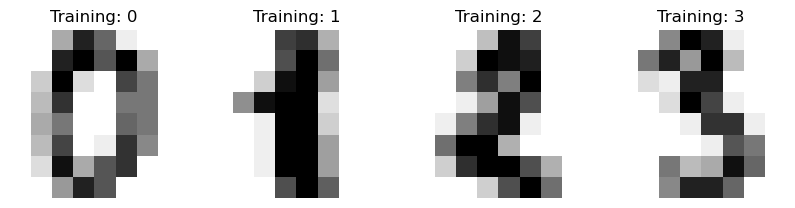

In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [3]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 90% train and 10% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.1, shuffle=True
)

In [ ]:
data.shape


(64,)

In [12]:
data[:10]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [13]:
data[:10][0].shape

(64,)

In [15]:
import tensorflow as tf

# Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(64,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Fit
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


c:\Users\Sepahrad\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4133 - loss: 2.2289 - val_accuracy: 0.8611 - val_loss: 0.5355
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9026 - loss: 0.3549 - val_accuracy: 0.9222 - val_loss: 0.2411
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9609 - loss: 0.1497 - val_accuracy: 0.9556 - val_loss: 0.1606
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9768 - loss: 0.1026 - val_accuracy: 0.9667 - val_loss: 0.1370
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9864 - loss: 0.0638 - val_accuracy: 0.9722 - val_loss: 0.1052
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9912 - loss: 0.0478 - val_accuracy: 0.9778 - val_loss: 0.0909
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9938 - loss: 0.0436 - val_accuracy: 0.9778 - val_loss: 0.0859
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9982 - loss: 0.0178 - val_accuracy: 0.9778 - val_loss: 0.0775
Epo

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


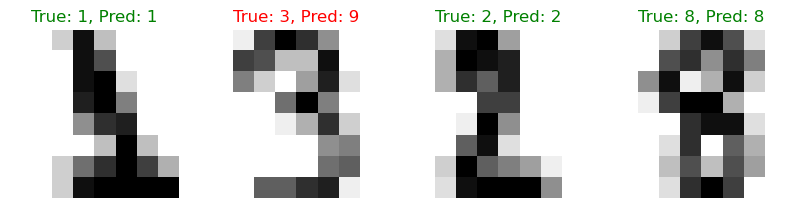

In [32]:
import numpy as np

# Predict the probabilities for each class
y_probs = model.predict(X_test)

# Get the class with the highest probability for each sample
y_pred = np.argmax(y_probs, axis=-1)

# Select four random indices from the test data
indices = np.random.choice(len(X_test), size=4, replace=False)

# Plot the images with the actual and predicted labels
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, true_label, pred_label in zip(axes, X_test[indices].reshape(-1, 8, 8), y_test[indices], y_pred[indices]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    title = f'True: {true_label}, Pred: {pred_label}'
    ax.set_title(title, color='green' if true_label == pred_label else 'red')

plt.show()